In [1]:
import igraph
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import pynauty
from scipy.linalg import ishermitian
# from scipy.sparse.csgraph import connected_components
from sympy.combinatorics import Permutation, PermutationGroup

from qlinks.model.weslei_model import WesleiModel
from utils import setup_igraph

np.set_printoptions(threshold=np.inf)
pd.set_option("display.max_rows", None)

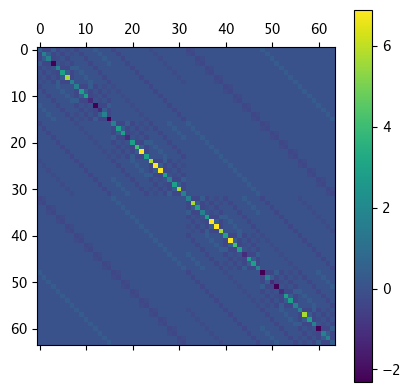

In [2]:
n = 6
coup_alpha, coup_beta, coup_h1, coup_h2 = (0.3, 0.5, 0, 0)
coup_alphas = np.array([coup_alpha + (-1) ** i for i in range(n)])
model = WesleiModel(n, coup_alphas, coup_beta, coup_h1, coup_h2, periodic=True)
mat = model.hamiltonian.toarray()
assert ishermitian(mat, atol=1e-12)
evals, evecs = np.linalg.eigh(mat)

plt.matshow(mat)
plt.colorbar()

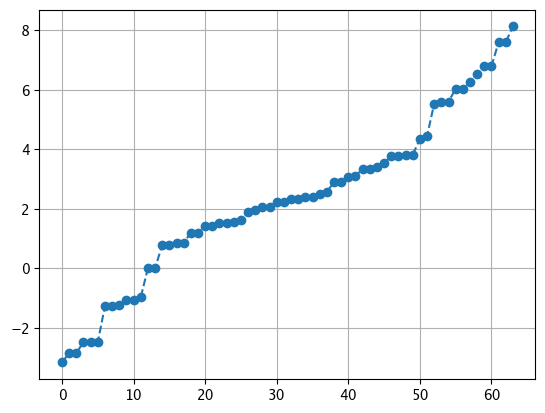

In [3]:
plt.plot(evals, linestyle="--", marker="o")
plt.grid()

In [4]:
evecs_df = pd.DataFrame.from_dict(
    {
        "eval": evals,
        "kin": [(evec.T @ model.kinetic_term @ evec).item() for evec in evecs.T],
        "pot": [(evec.T @ model.potential_term @ evec).item() for evec in evecs.T],
    }
)
evecs_df[evecs_df["eval"].abs() < 1e-12]

,eval,kin,pot
12,-1.990039e-15,-0.873161,0.873161
13,3.575969e-17,-0.872904,0.872904


array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63])

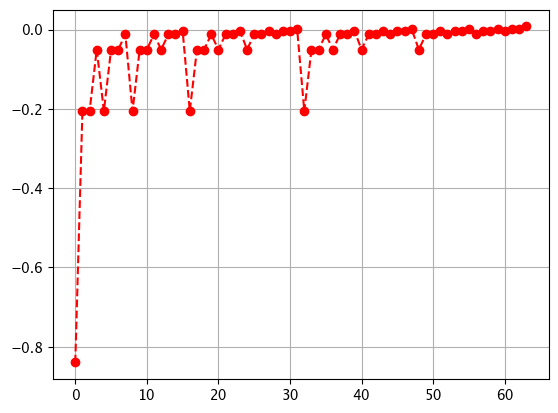

In [5]:
i = 13
plt.plot(evecs[:, i].T, linestyle="--", marker="o", color="red")
plt.grid()
np.where(np.abs(evecs[:, i]) > 1e-6)[0]

In [6]:
g = nx.from_scipy_sparse_array(model.kinetic_term)
ig = igraph.Graph.from_networkx(g)

ntg = pynauty.Graph(
    ig.vcount(),
    directed=True,
    adjacency_dict=nx.to_dict_of_lists(g),
)
aut_gp = pynauty.autgrp(ntg)[0]

perm_gp = PermutationGroup([Permutation(p) for p in aut_gp])

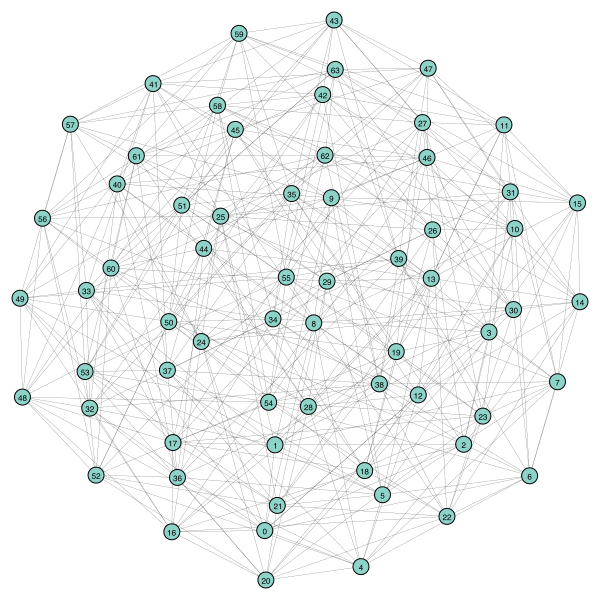

In [7]:
g = nx.from_scipy_sparse_array(model.kinetic_term)

highlight = [
    # np.where(np.abs(evecs[:, 231]) > 1e-6)[0],
]
# highlight = list(aut.degree_partition.values())
highlight = perm_gp.orbits()
# highlight = list(nx.bipartite.sets(g))

# highlight_color = list(mcolors.TABLEAU_COLORS.values())
# highlight_color = list(mcolors.CSS4_COLORS.values())
cmap = plt.get_cmap('Set3')
highlight_color = [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
cmap = plt.get_cmap('Set2')
highlight_color += [mcolors.to_hex(cmap(i)) for i in range(cmap.N)]
highlight_color *= 2000
# highlight_color = [
#     "dimgray",
#     "whitesmoke",
#     "deepskyblue",
#     "yellowgreen",
#     "aqua",
#     "pink",
#     "tomato",
#     "royalblue",
#     "blueviolet",
#     "cornflowerblue",
#     "limegreen",
# ]

ig = setup_igraph(g, highlight, highlight_color)

degree = np.array(list(dict(g.degree).values()))
# (bipartite, types) = ig.is_bipartite(return_types=True)
# nodes = [int(n) for n in list(sub_sub_ig.vs["label"])]
# outer_boundary = list(nx.node_boundary(g, nodes))
# sub_ig = ig.induced_subgraph(np.append(nodes, outer_boundary))

# sub_ig = ig.induced_subgraph(np.where(degree == 8)[0])
# fig, ax = plt.subplots(figsize=(6, 6), facecolor="white")
igraph.plot(
    ig,
    # layout=ig.layout_kamada_kawai(),
    # layout=ig.layout_reingold_tilford(root=[0, 25, 50, 75]),
    # layout=ig.layout_bipartite(types=types),
    # layout=ig.layout_mds().scale(6),
    vertex_size=16,
    vertex_label_size=8,
    # vertex_label_dist=1.5,
    edge_width=0.2,
    # edge_color="darkgray",
    # target="xy_graph_pbc_4.svg"
    # bbox=(1000,1000),
)

In [8]:
mat = nx.to_numpy_array(ig.to_networkx())
print(mat.shape[0], mat.shape[0] - np.linalg.matrix_rank(mat), nx.is_bipartite(ig.to_networkx()))

64 0 False
